# Example 1. Authorizing an application to access Twitter account data

In [1]:
import twitter
# Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'qKxlLUnpcgMgYw1rmIai1lV3l'
CONSUMER_SECRET ='NaR6M8qIXCifiYtY165R0oa0BlQAOI9tIM0bDZir2EA59uXQku'
OAUTH_TOKEN = '72779602-v2LRZ4jUZh1GDOscXF3EkSZiFKXVnOIkLreBoUPmz'
OAUTH_TOKEN_SECRET = 'olFPp3joDlatAkKplFQP3BiNGhkgi3ENhrbTIVpqDuPKL'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print twitter_api

# Example 2. Retrieving trends

In [4]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print world_trends
print
print us_trends

[{u'created_at': u'2015-09-09T16:44:32Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23AppleEvent', u'query': u'%23AppleEvent', u'name': u'#AppleEvent', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23HaceMuchoQueNo', u'query': u'%23HaceMuchoQueNo', u'name': u'#HaceMuchoQueNo', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%22iPhone+6s%22', u'query': u'%22iPhone+6s%22', u'name': u'iPhone 6s', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23LittleMixSingle2', u'query': u'%23LittleMixSingle2', u'name': u'#LittleMixSingle2', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23K%C3%BCrtlerY%C3%BCr%C3%BCyorSarayTitriyor', u'query': u'%23K%C3%BCrtlerY%C3%BCr%C3%BCyorSarayTitriyor', u'name': u'#K\xfcrtlerY\xfcr\xfcyorSarayTitriyor', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23OTWOLMostKiligNight', u'query': u'%23OTWOLMostKiligNight', u'name': u'#OTWOLMostKiligNight', u'promote

# Example 3. Displaying API responses as pretty-printed JSON

In [5]:
import json

print json.dumps(world_trends, indent=1)
print
print json.dumps(us_trends, indent=1)

[
 {
  "created_at": "2015-09-09T16:44:32Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23AppleEvent", 
    "query": "%23AppleEvent", 
    "name": "#AppleEvent", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23HaceMuchoQueNo", 
    "query": "%23HaceMuchoQueNo", 
    "name": "#HaceMuchoQueNo", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%22iPhone+6s%22", 
    "query": "%22iPhone+6s%22", 
    "name": "iPhone 6s", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23LittleMixSingle2", 
    "query": "%23LittleMixSingle2", 
    "name": "#LittleMixSingle2", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23K%C3%BCrtlerY%C3%BCr%C3%BCyorSarayTitriyor", 
    "query": "%23K%C3%BCrtlerY%C3%BCr%C3%BCyorSarayTitriyor", 
    "name": "#K\u00fcrtlerY\u00fcr\u00fcyorSarayTitriyor", 
    "promoted_content": null
   }, 
   {
    "url": "http://twi

# Example 4. Computing the intersection of two sets of trends

In [3]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print common_trends

set([u'#AppleEvent', u'iPhone 6s'])


# Example 5. Collecting search results

In [6]:
#  Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.
import json

q = '#iPhone 6s' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses, indent=4)


Length of statuses 82
[
    {
        "contributors": null, 
        "truncated": false, 
        "text": "#iPhoneNews #iPhone #news #Apple EN DIRECT. iPhone 6S : suivez la keynote sur le dernier smartphone Apple:\u2026 http://t.co/OOkXwsuHP8", 
        "is_quote_status": false, 
        "in_reply_to_status_id": null, 
        "id": 641655160318525442, 
        "favorite_count": 0, 
        "source": "<a href=\"http://dlvr.it\" rel=\"nofollow\">dlvr.it</a>", 
        "retweeted": false, 
        "coordinates": null, 
        "entities": {
            "symbols": [], 
            "user_mentions": [], 
            "hashtags": [
                {
                    "indices": [
                        0, 
                        11
                    ], 
                    "text": "iPhoneNews"
                }, 
                {
                    "indices": [
                        12, 
                        19
                    ], 
                    "text": "iPhone"
        

# Example 6. Extracting text, screen names, and hashtags from tweets

In [11]:
import time


status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "#iPhoneNews #iPhone #news #Apple EN DIRECT. iPhone 6S : suivez la keynote sur le dernier smartphone Apple:\u2026 http://t.co/OOkXwsuHP8", 
 "#iPhoneNews #iPhone #news #Apple EN DIRECT. iPhone 6S, Apple TV, iPad Pro... Suivez la keynote d'Apple: Le groupe\u2026 http://t.co/qaG7FsZoJ2", 
 "#iPhoneNews #iPhone #news #Apple L'iPhone 6S arrive : suivez la conf\u00e9rence en direct ce soir \u00e0 19h: La Keynote qui\u2026 http://t.co/MMo9cfh1HU", 
 "EN DIRECT. #iPhone 6S, #Apple TV, iPad Pro... Suivez la keynote d #Apple https://t.co/eK6xJua76h", 
 "Ok let's see my new #iPhone 6s Plus \ud83d\udcf2 &amp; \uf8ffTV #t #f http://t.co/OM6HKGRhad http://t.co/3cOlRlJPzD"
]
[
 "TelegraphTech", 
 "LeHuffPost", 
 "RemedyPR", 
 "mydigi", 
 "appleinsider"
]
[
 "iPhoneNews", 
 "iPhone", 
 "news", 
 "Apple", 
 "iPhoneNews"
]
[
 "#iPhoneNews", 
 "#iPhone", 
 "#news", 
 "#Apple", 
 "EN"
]


# Example 7. Creating a basic frequency distribution from the words in tweets

In [12]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print

[(u'#iPhone', 54), (u'iPhone', 46), (u'\u2013', 38), (u'to', 24), (u'#iphone', 23), (u'#Apple', 22), (u'Apple\u2019s', 21), (u'in', 21), (u'see', 21), (u'6s', 21)]

[(u'iPhone_News', 2), (u'TelegraphTech', 1), (u'HusainHaider', 1), (u'venturelaunch', 1), (u'HuffPostQuebec', 1), (u'mydigi', 1), (u'Yusnaby', 1), (u'appleinsider', 1), (u'LeHuffPost', 1), (u'RemedyPR', 1)]

[(u'iPhone', 57), (u'Apple', 25), (u'iphone', 24), (u'iPhone6s', 20), (u'TimCook', 19), (u'apple', 9), (u'AppleEvent', 6), (u'news', 4), (u'iPad', 3), (u'iPhoneNews', 3)]



# Example 8. Using prettytable to display tuples in a nice tabular format

In [13]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt

+---------+-------+
| Word    | Count |
+---------+-------+
| #iPhone |    54 |
| iPhone  |    46 |
| –       |    38 |
| to      |    24 |
| #iphone |    23 |
| #Apple  |    22 |
| Apple’s |    21 |
| in      |    21 |
| see     |    21 |
| 6s      |    21 |
+---------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| iPhone_News    |     2 |
| TelegraphTech  |     1 |
| HusainHaider   |     1 |
| venturelaunch  |     1 |
| HuffPostQuebec |     1 |
| mydigi         |     1 |
| Yusnaby        |     1 |
| appleinsider   |     1 |
| LeHuffPost     |     1 |
| RemedyPR       |     1 |
+----------------+-------+
+------------+-------+
| Hashtag    | Count |
+------------+-------+
| iPhone     |    57 |
| Apple      |    25 |
| iphone     |    24 |
| iPhone6s   |    20 |
| TimCook    |    19 |
| apple      |     9 |
| AppleEvent |     6 |
| news       |     4 |
| iPad       |     3 |
| iPhoneNews |     3 |
+------------+-------+


# Example 9. Calculating lexical diversity for tweets

In [14]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.425131677953
0.916666666667
0.212389380531
16.2073170732


# Example 10. Finding the most popular retweets

In [15]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+--------------+----------------------------------------------------+
| Count | Screen Name  | Text                                               |
+-------+--------------+----------------------------------------------------+
| 33    | iPhone_News  | RT @iPhone_News: Live Coverage of Apple's 'Hey     |
|       |              | Siri' Event: iPhone 6s, Apple TV, iPad Pro, and    |
|       |              | More http://t.co/ENRJ4lMBih #iPhone                |
| 33    | iPhone_News  | RT @iPhone_News: Live Coverage of Apple's 'Hey     |
|       |              | Siri' Event: iPhone 6s, Apple TV, iPad Pro, and    |
|       |              | More http://t.co/ENRJ4lMBih #iPhone                |
| 30    | mydigi       | RT @mydigi: #iPhone 6S or 7? Or maybe a new #iPad? |
|       |              | What do you think will be announced tonight? 😱    |
|       |              | #AppleEvent                                        |
| 27    | appleinsider | RT @appleinsider: Apple's #iPhone 6s to 

#  Example 12. Plotting frequencies of words

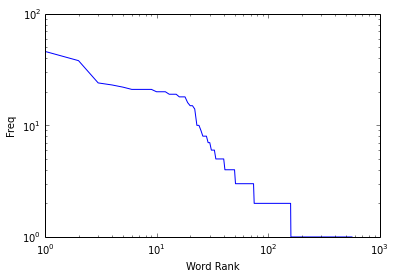

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


word_counts = sorted(Counter(words).values(), reverse=True)



plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Example 14. Generating a histogram of retweet counts

[30, 27, 1, 2, 33, 1, 11, 33, 1]


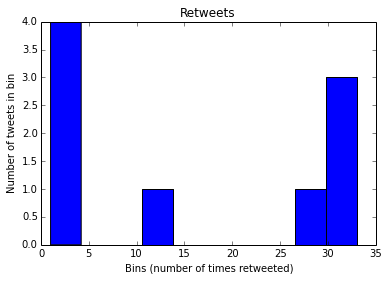

In [23]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print counts